### We will start according to the instructions and in this file we will concat one tsv and one json file to get the final dataset. After that, we will perform some anlysis and visualisation and try to get some important insights from the data.

In [7]:
### importing some important libraries we are going to use for this file
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
a=pd.read_csv('Order.tsv',delimiter='\t')

In [4]:
a.head(2)

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4


In [7]:
b=pd.read_json('Order_breakdown.json')

In [12]:
b.head(2)

,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases


### As, we have successfully read the both files and made the dataframe of both of thes. Now, it's time to make a merged dataframe from these files. And then import it to a new file name which we will use to make visualisation and analysis and for machine learning part.

In [21]:
merged=pd.merge(a,b,on='Order ID')   ### We merged both of the dataframes on a single common column

In [24]:
merged.to_csv('merged.csv',index=False)  ### Here, we have saved the merged file into csv format for further use

#### It's time for some analysis and visualization

In [3]:
merged.head(2)

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases


In [4]:
merged.shape

(8047, 19)

##### From the above result we can conclude that this dataframe has about 8047 rows and 19 columns 

In [28]:
merged.isnull().sum()    ### When we are running this code we found that this dataset has no null value. So, dataframe is quite good.

Order ID           0
Order Date         0
Customer Name      0
City               0
Country            0
Region             0
Segment            0
Ship Date          0
Ship Mode          0
State              0
Days to Ship       0
Product Name       0
Discount           0
Actual Discount    0
Sales              0
Profit             0
Quantity           0
Category           0
Sub-Category       0
dtype: int64

In [30]:
merged.duplicated().sum()   
### After running this code, we are getting only 2 duplicated value and there will we not that much effect on the data. So, we will do not change anything.

2

In [5]:
merged.info()   ### From this, we will get information about the data types and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         8047 non-null   object 
 1   Order Date       8047 non-null   object 
 2   Customer Name    8047 non-null   object 
 3   City             8047 non-null   object 
 4   Country          8047 non-null   object 
 5   Region           8047 non-null   object 
 6   Segment          8047 non-null   object 
 7   Ship Date        8047 non-null   object 
 8   Ship Mode        8047 non-null   object 
 9   State            8047 non-null   object 
 10  Days to Ship     8047 non-null   int64  
 11  Product Name     8047 non-null   object 
 12  Discount         8047 non-null   float64
 13  Actual Discount  8047 non-null   float64
 14  Sales            8047 non-null   int64  
 15  Profit           8047 non-null   int64  
 16  Quantity         8047 non-null   int64  
 17  Category      

In [37]:
merged.describe()      ### We will get an overview of some statistical information of the data . It will only will be of numerical values till we not specify the include values


,Days to Ship,Discount,Actual Discount,Sales,Profit,Quantity
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,4.007332,0.110047,29.793078,291.845657,35.198211,3.772089
std,1.741232,0.181773,88.817656,485.212156,178.125844,2.203369
min,0.000000,0.000000,0.000000,3.000000,-3060.000000,1.000000
25%,3.000000,0.000000,0.000000,48.000000,1.000000,2.000000
50%,4.000000,0.000000,0.000000,117.000000,14.000000,3.000000
75%,5.000000,0.100000,22.000000,313.000000,47.000000,5.000000
max,7.000000,0.850000,1700.000000,6517.000000,2476.000000,14.000000


In [38]:
print(merged.columns)
merged.head(2)

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship',
       'Product Name', 'Discount', 'Actual Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub-Category'],
      dtype='object')


,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases


#### From some above information we are getting some columns which are not of much use so, we will simply drop those values

In [8]:
### Two of the columns are having data related to dates. So, first we will change thsoe to date time dtype and then make new variable from those

merged['Order Date']=pd.to_datetime(merged['Order Date'])
merged['Ship Date']=pd.to_datetime(merged['Ship Date'])

In [9]:
merged['O_day']=merged['Order Date'].dt.day           
merged['O_month']=merged['Order Date'].dt.month                 
merged['O_year']=merged['Order Date'].dt.year

### Here, I am splitting order date column into day,year and month wise because sometimes it happens the effect of sales can be seen in weekends or any special month

In [12]:
merged.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Days to Ship',
       'Product Name', 'Discount', 'Actual Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub-Category', 'O_day', 'O_month', 'O_year'],
      dtype='object')

In [14]:
### Now, we will drop some unnecessary columns from the dataframe
merged.drop(['Order ID','Order Date','Customer Name','Ship Date'],axis=1,inplace=True)

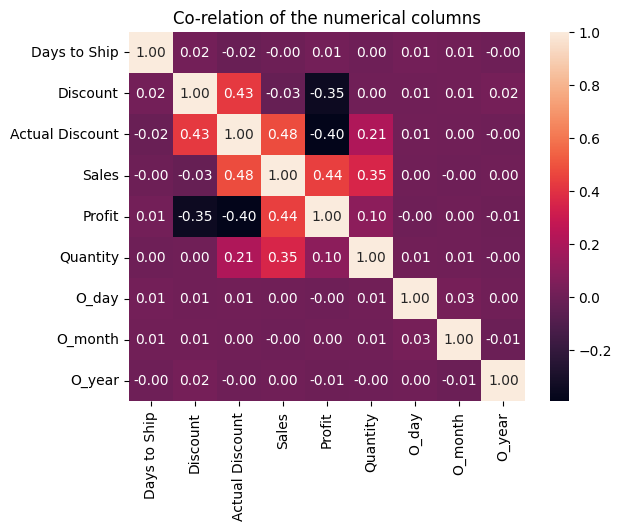

In [71]:
### We, will try to get an overview of co-relation for the columns of this 
sns.heatmap(merged.corr(numeric_only=True),annot=True,fmt='.2f')
plt.title('Co-relation of the numerical columns')
plt.show()

#### From the above, graph we can say that only some of the columns have a positive co-relation even that is also very less

In [72]:
### Now, we will use a loop to get an idea of unique values in the columns and value_counts for them

for column_name in merged.columns:
    unique_count = merged[column_name].nunique()
    print(f"'{column_name}' has {unique_count} unique value(s).")

'City' has 999 unique value(s).
'Country' has 15 unique value(s).
'Region' has 3 unique value(s).
'Segment' has 3 unique value(s).
'Ship Mode' has 4 unique value(s).
'State' has 127 unique value(s).
'Days to Ship' has 8 unique value(s).
'Product Name' has 1810 unique value(s).
'Discount' has 14 unique value(s).
'Actual Discount' has 1256 unique value(s).
'Sales' has 1248 unique value(s).
'Profit' has 845 unique value(s).
'Quantity' has 14 unique value(s).
'Category' has 3 unique value(s).
'Sub-Category' has 17 unique value(s).
'O_day' has 31 unique value(s).
'O_month' has 12 unique value(s).
'O_year' has 4 unique value(s).


#### As, we can see in the above output that 4 or 5 columns have no of unique values more than 100 
##### So, we will leave them and plot a graph for the remaining columns to have a better visualisation 

In [32]:
columns_with_less_unique_values = [column_name for column_name in merged.columns if merged[column_name].nunique() < 100]

print(columns_with_less_unique_values)

['Country', 'Region', 'Segment', 'Ship Mode', 'Days to Ship', 'Discount', 'Quantity', 'Category', 'Sub-Category', 'O_day', 'O_month', 'O_year']


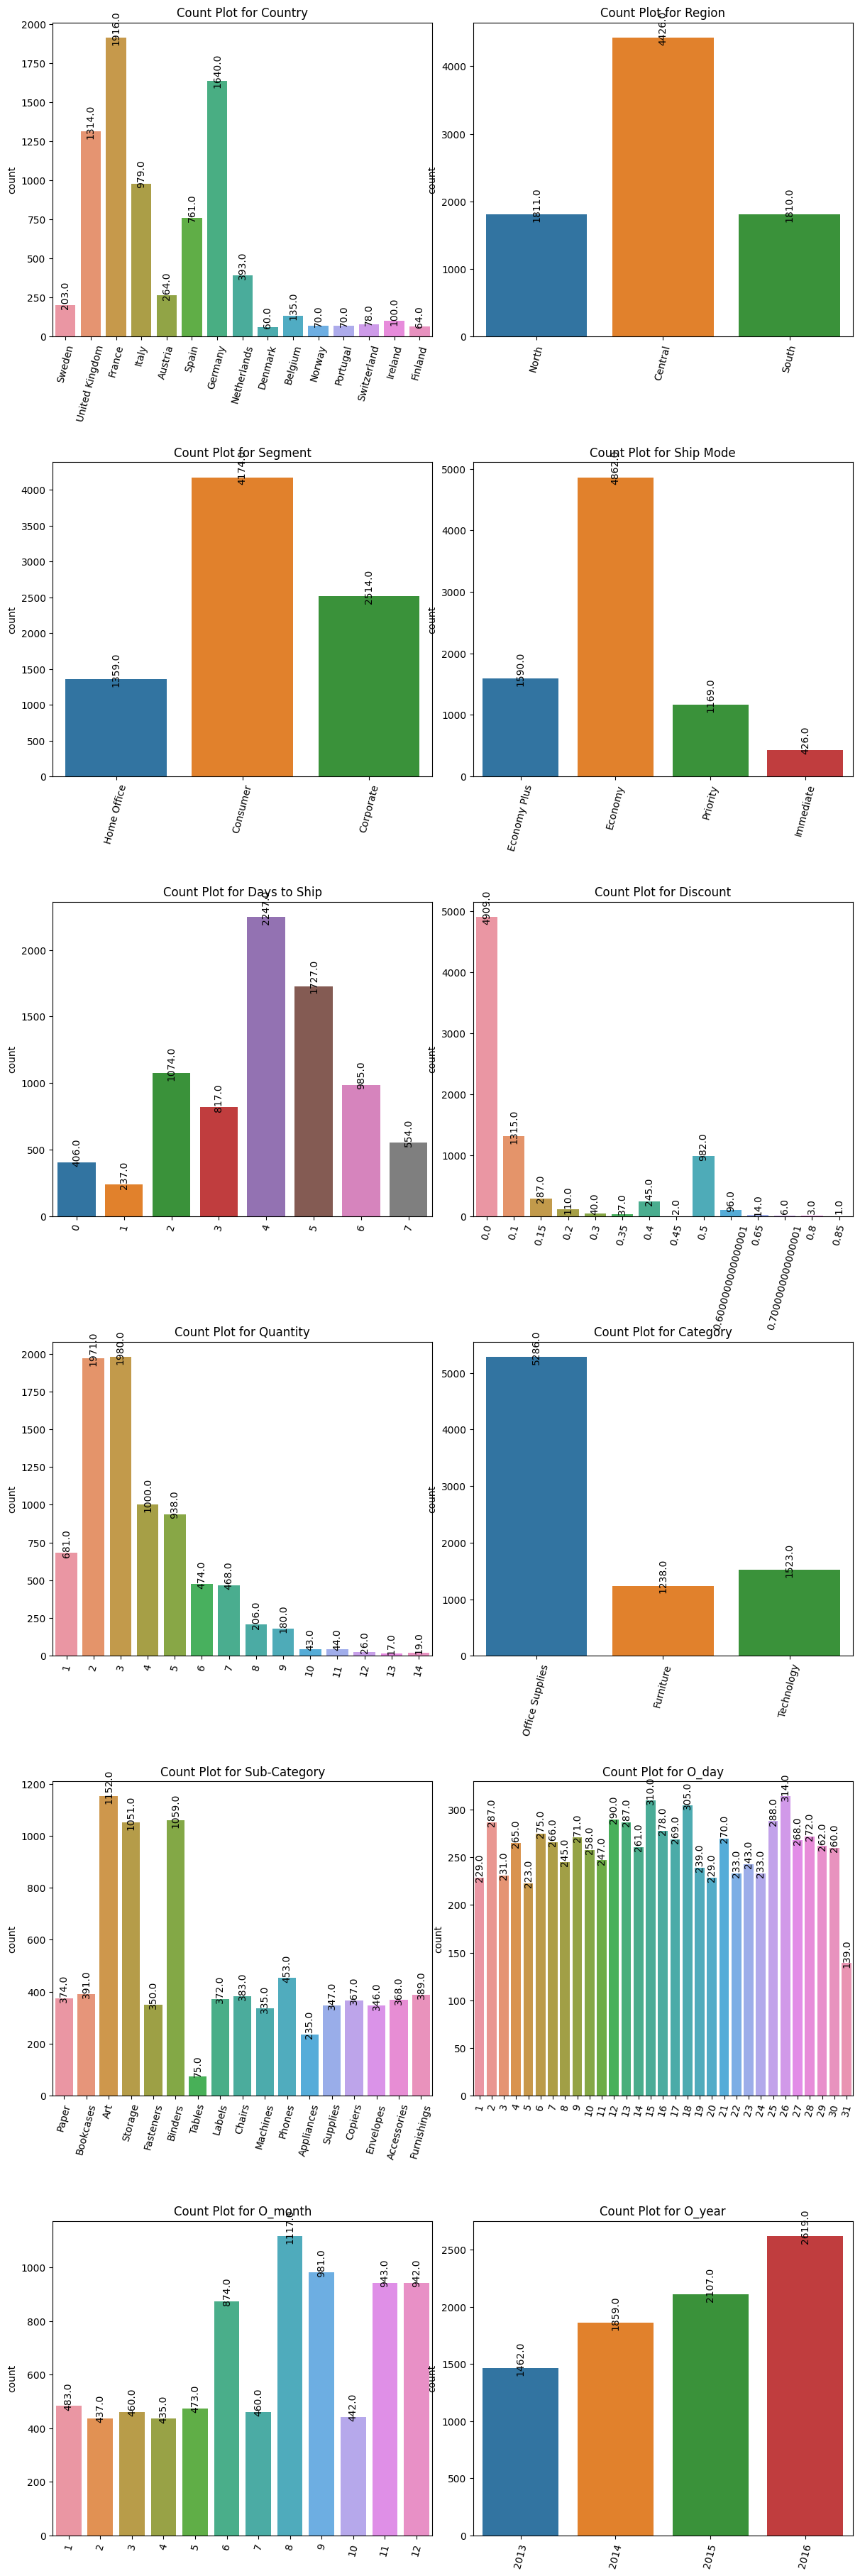

In [44]:
num_plots = len(columns_with_less_unique_values)
num_rows = (num_plots // 2) + (num_plots % 2)
num_cols = 2 if num_plots > 1 else 1

# Creating a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
fig.tight_layout()

# Adjusting space between subplots
plt.subplots_adjust(hspace=0.4)

# Looping through columns and create count plots
for i, column_name in enumerate(columns_with_less_unique_values):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_plots > 1 else axes

    sns.countplot(data=merged, x=column_name, ax=ax)
    ax.set_title(f"Count Plot for {column_name}")
    ax.tick_params(axis='x', rotation=75)
    ax.set_xlabel('')

    for p in ax.patches:   ### To adding annotations
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points',rotation=90)

plt.show()

From the graph above, we can have an overview of how spread or like which type is having more values than others

In [46]:
### Now, we will try to have a look on value_count for nearly each of tfor column in df.columns:
for column in merged.columns:
    value_counts = merged[column].value_counts()
    print(f"Value counts for column '{column}':\n{value_counts}\n")


Value counts for column 'City':
City
London                219
Vienna                196
Berlin                177
Madrid                150
Stockholm             124
                     ... 
Cercola                 1
Fareham                 1
Tremblay-en-France      1
Guimarães               1
Sagunto                 1
Name: count, Length: 999, dtype: int64

Value counts for column 'Country':
Country
France            1916
Germany           1640
United Kingdom    1314
Italy              979
Spain              761
Netherlands        393
Austria            264
Sweden             203
Belgium            135
Ireland            100
Switzerland         78
Norway              70
Portugal            70
Finland             64
Denmark             60
Name: count, dtype: int64

Value counts for column 'Region':
Region
Central    4426
North      1811
South      1810
Name: count, dtype: int64

Value counts for column 'Segment':
Segment
Consumer       4174
Corporate      2514
Home Office    1359
Nam

In [ ]:
### Now, we will perform some graphical operations on nearly every column of the dataframe one-by-one

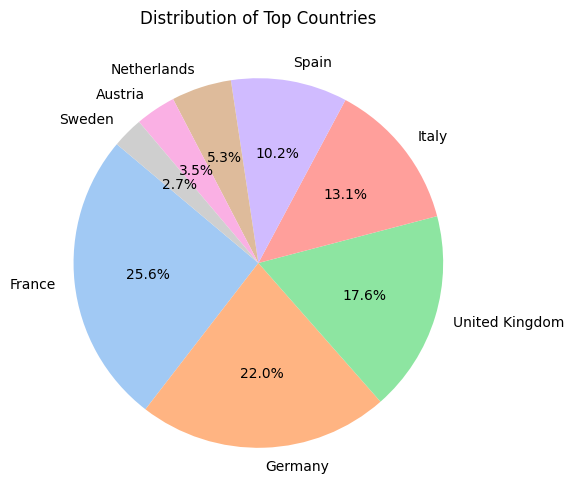

In [85]:
mer_country=merged['Country'].value_counts().reset_index()
mer_country=mer_country[mer_country['count']>200]

plt.figure(figsize=(6,6))
plt.pie(mer_country['count'], labels=mer_country['Country'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'),)
plt.title('Distribution of Top Countries')
plt.show()   ### We tried to show the distribution of top countries in the dataset

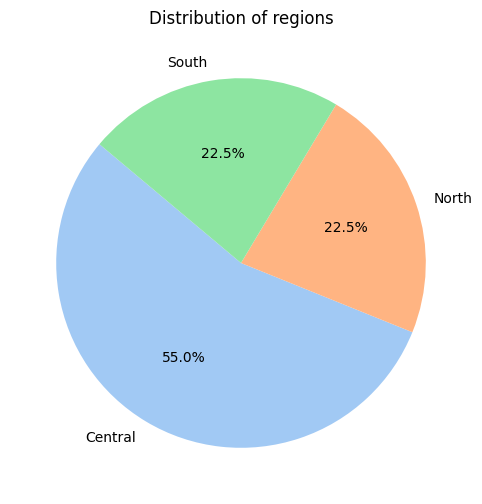

In [89]:
mer_reg=merged['Region'].value_counts().reset_index()
plt.figure(figsize=(6,6))
plt.pie(mer_reg['count'], labels=mer_reg['Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'),)
plt.title('Distribution of regions')
plt.show() 

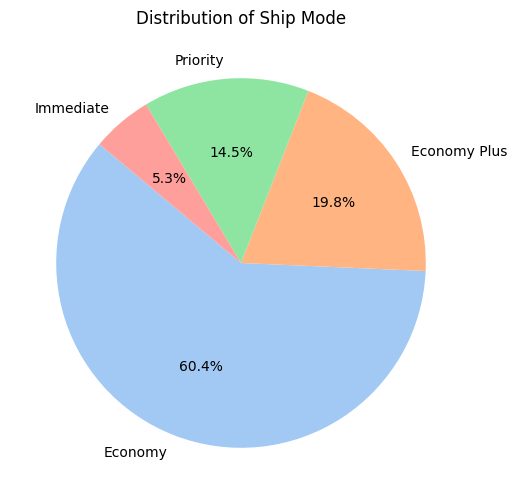

In [94]:
mer_ship=merged['Ship Mode'].value_counts().reset_index()

plt.figure(figsize=(6,6))
plt.pie(mer_ship['count'], labels=mer_ship['Ship Mode'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'),)
plt.title('Distribution of Ship Mode')
plt.show()    ### We can conclude that 

In [98]:
mer_cat=merged['Category'].value_counts().reset_index()
mer_sub_cat=merged['Sub-Category'].value_counts().reset_index()


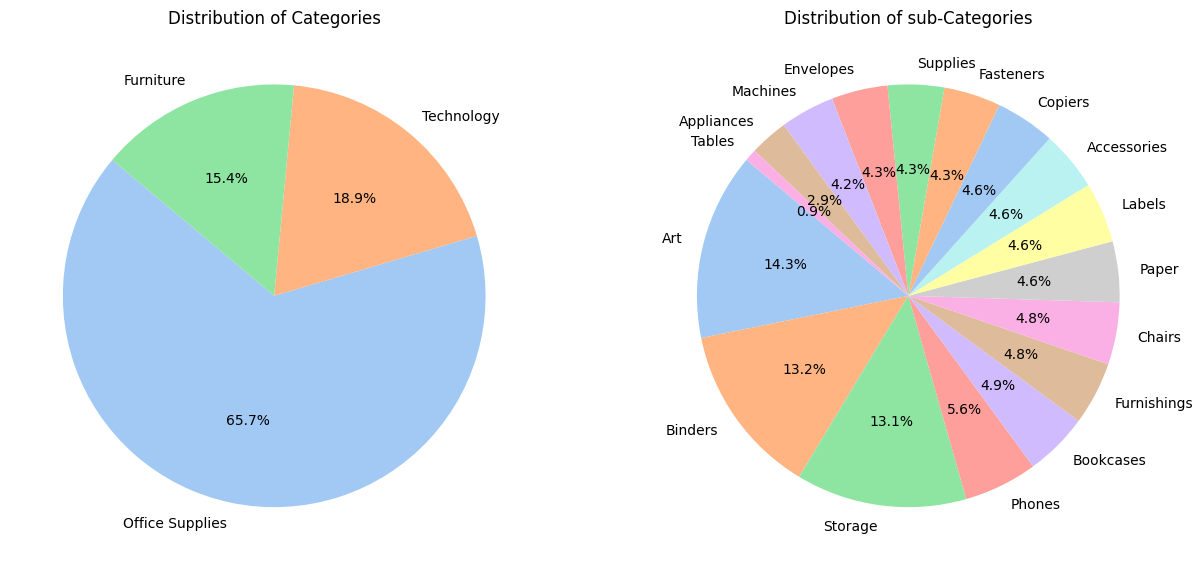

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].pie(mer_cat['count'], labels=mer_cat['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'),)
axes[0].set_title('Distribution of Categories')



axes[1].pie(mer_sub_cat['count'], labels=mer_sub_cat['Sub-Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'),)
axes[1].set_title('Distribution of sub-Categories')
plt.show()

In [105]:
merged.columns

Index(['City', 'Country', 'Region', 'Segment', 'Ship Mode', 'State',
       'Days to Ship', 'Product Name', 'Discount', 'Actual Discount', 'Sales',
       'Profit', 'Quantity', 'Category', 'Sub-Category', 'O_day', 'O_month',
       'O_year'],
      dtype='object')

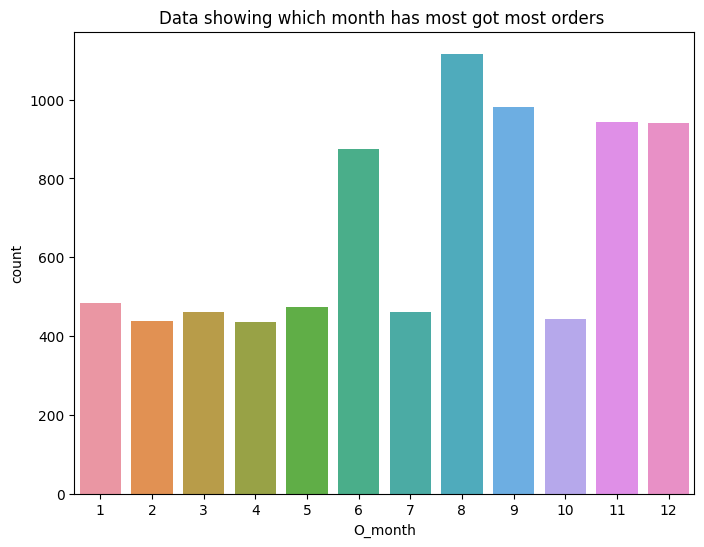

In [223]:
mer_month=merged['O_month'].value_counts().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=mer_month,x='O_month',y='count')
plt.title('Data showing which month has most got most orders ')
plt.show()

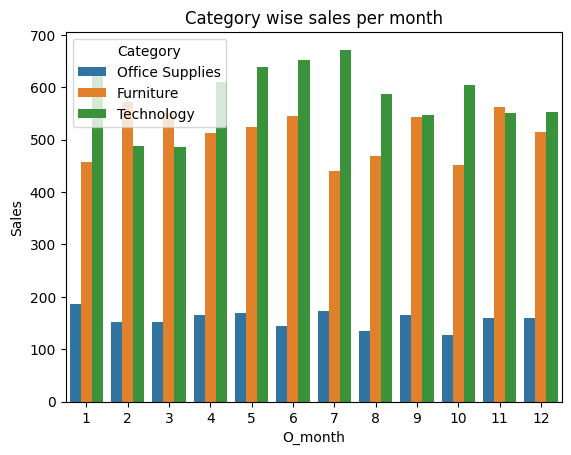

In [129]:
sns.barplot(data=merged,x='O_month',y='Sales',ci=None,hue='Category')
plt.title('Category wise sales per month')
plt.show()

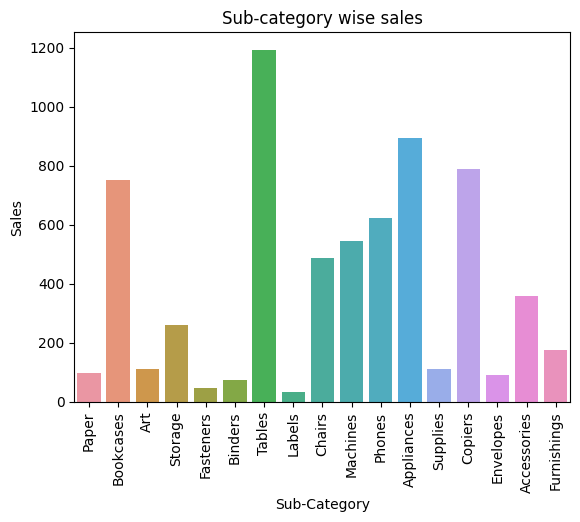

In [236]:
sns.barplot(data=merged,x='Sub-Category',y='Sales',ci=None,)
plt.title('Sub-category wise sales')
plt.xticks(rotation=90)
plt.show()

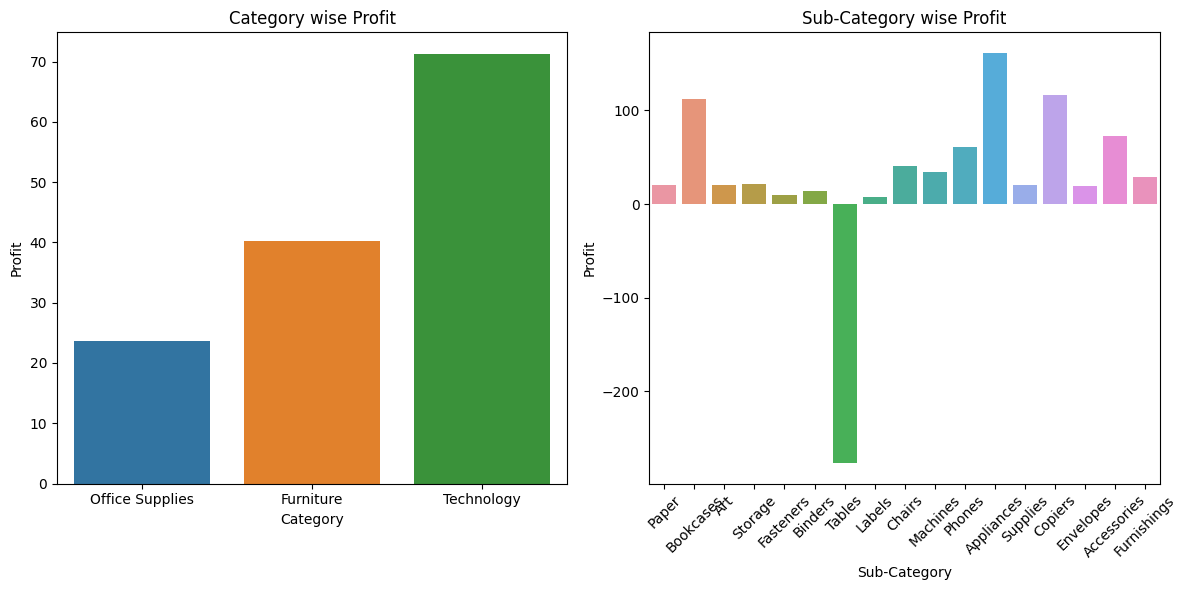

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# First subplot - Category-wise Profit
sns.barplot(data=merged, x='Category', y='Profit', ci=None, ax=axes[0])
axes[0].set_title('Category wise Profit')

# Second subplot - Sub-Category-wise Profit
sns.barplot(data=merged, x='Sub-Category', y='Profit', ci=None, ax=axes[1])
axes[1].set_title('Sub-Category wise Profit')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

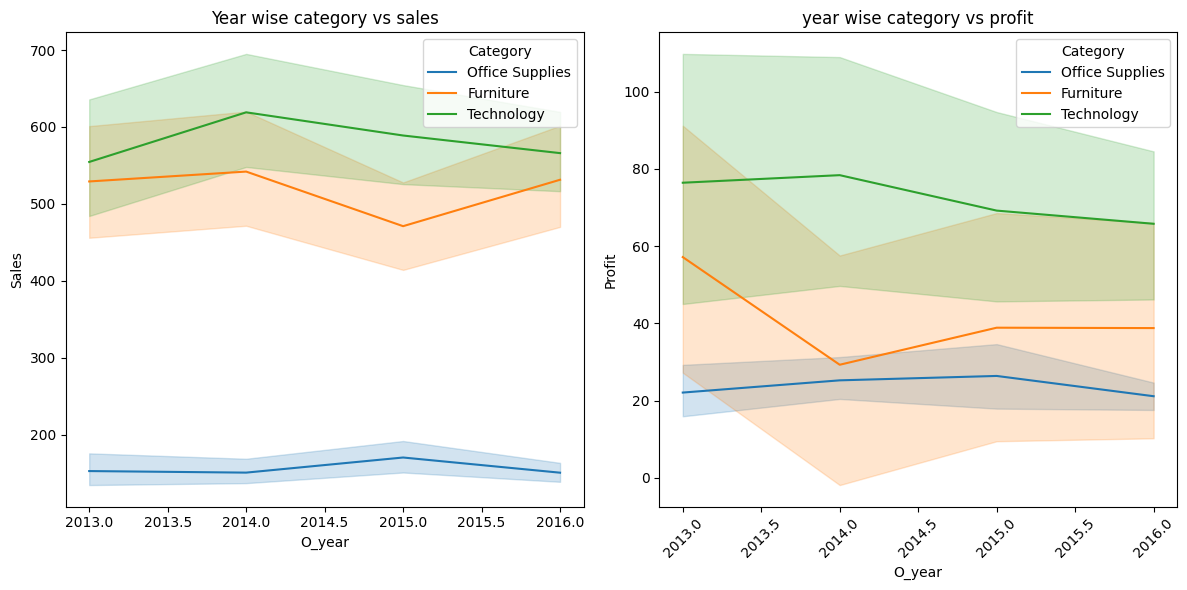

In [233]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# First subplot - Category-wise Profit
sns.lineplot(data=merged,x='O_year',y='Sales',hue='Category',ax=axes[0])
axes[0].set_title('Year wise category vs sales')
# Second subplot - Sub-Category-wise Profit
sns.lineplot(data=merged,x='O_year',y='Profit',hue='Category',ax=axes[1])
axes[1].set_title('year wise category vs profit')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

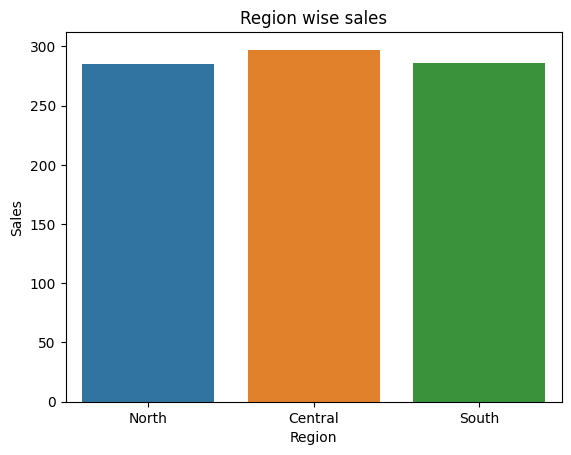

In [191]:
sns.barplot(data=merged,x='Region',y='Sales',ci=None)
plt.title('Region wise sales')
plt.show()

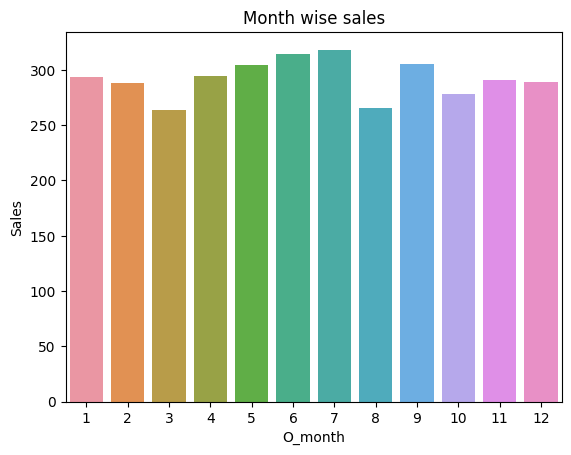

In [195]:
sns.barplot(data=merged,x='O_month',y='Sales',ci=None)
plt.title('Month wise sales')
plt.show()

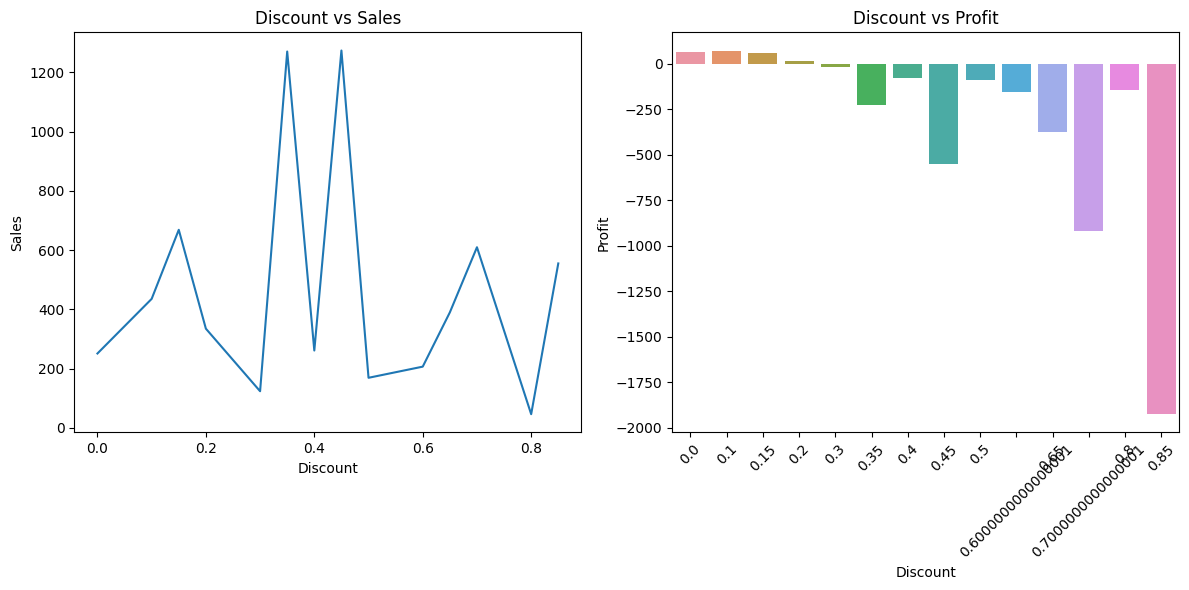

In [203]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# First subplot - Category-wise Profit
sns.lineplot(data=merged, x='Discount', y='Sales', ci=None, ax=axes[0])
axes[0].set_title('Discount vs Sales')

# Second subplot - Sub-Category-wise Profit
sns.barplot(data=merged, x='Discount', y='Profit', ci=None, ax=axes[1])
axes[1].set_title('Discount vs Profit')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

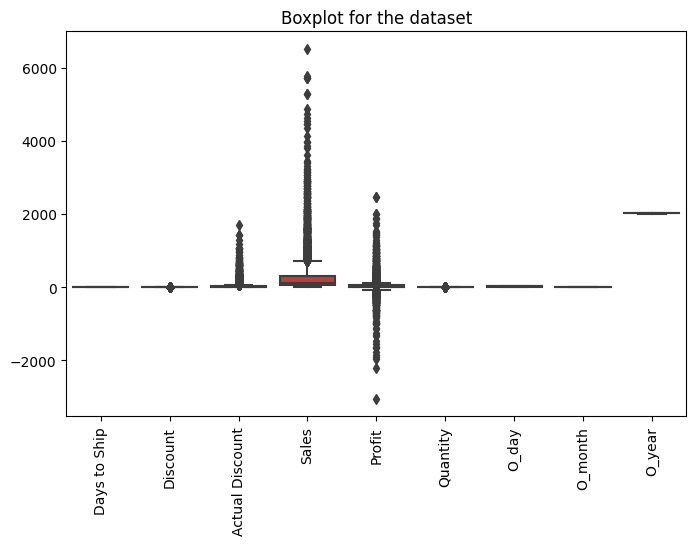

In [209]:
plt.figure(figsize=(8,5))
sns.boxplot(merged)
plt.title('Boxplot for the dataset')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Sales vs Profit')

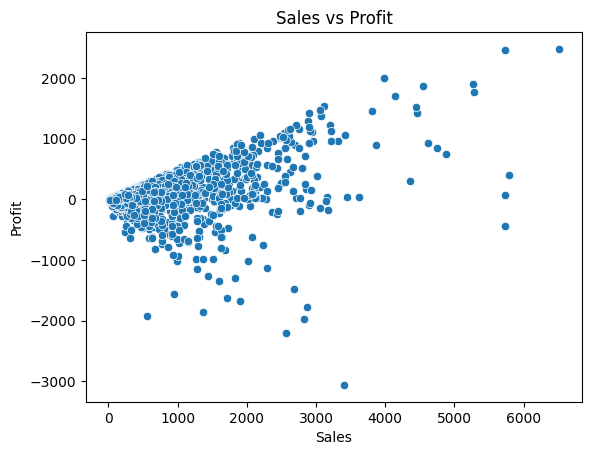

In [212]:
sns.scatterplot(data=merged,x='Sales',y='Profit')
plt.title('Sales vs Profit')

Text(0.5, 1.0, 'Domination of top States in the sales')

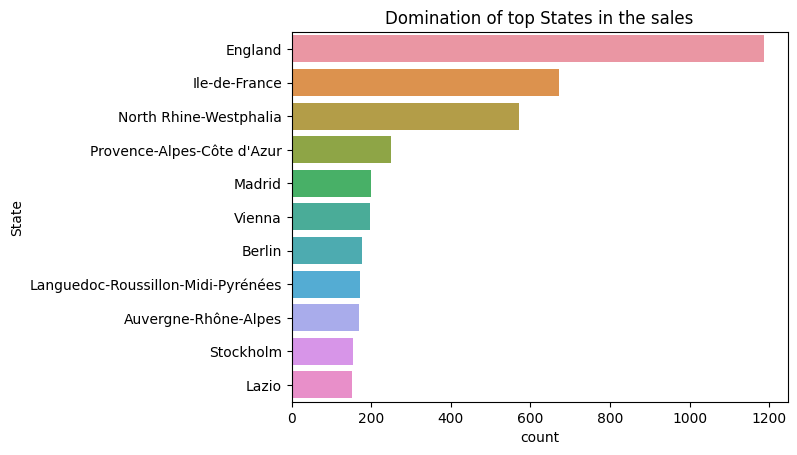

In [222]:
mer_sta=merged['State'].value_counts().reset_index()
mer_sta=mer_sta[mer_sta['count']>150]
sns.barplot(data=mer_sta,x='count',y='State')
plt.title('Domination of top States in the sales')

### Thus, we tried to cover some of the visual information from the data. The information can vary with our every single thought. We just tried some of the most valuable from those. At last, we will use this merged file for the ml part in the other file. I hope you will have get some insights from this file.